In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
df = pd.read_csv('mibilegame.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df_gate_30 = df.query('version == "gate_30"')
df_gate_40 = df.query('version == "gate_40"')

In [4]:
df_gate_30 

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
13,2179,gate_30,39,True,False
...,...,...,...,...,...
90179,9998576,gate_30,14,True,False
90180,9998623,gate_30,7,False,False
90182,9999178,gate_30,21,True,False
90183,9999349,gate_30,10,False,False


ShapiroResult(statistic=0.08805108070373535, pvalue=0.0)

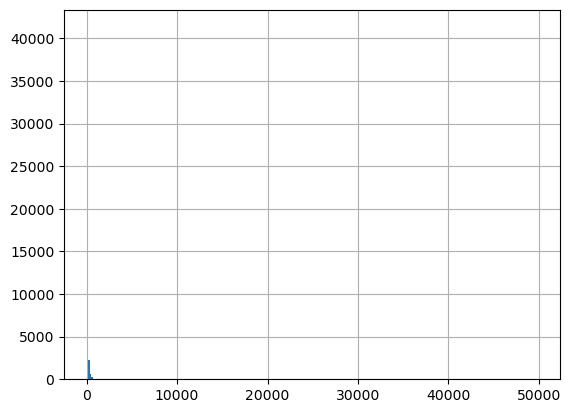

In [10]:
df_gate_30 ["sum_gamerounds"].hist(bins=300)
stats.shapiro(df_gate_30 ["sum_gamerounds"]) #------->H0 = it's normal & H1 = it isn't normal

##### Because the p-value is less than 0.05, we reject the null hypothesis, so the data are not normal.

In [8]:
df_gate_40

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
7,1444,gate_40,2,False,False
...,...,...,...,...,...
90181,9998733,gate_40,10,True,False
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90187,9999768,gate_40,51,True,False


c:\Users\Bastani\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.48256635665893555, pvalue=0.0)

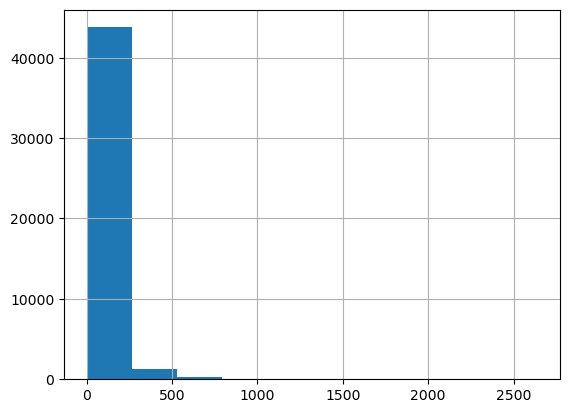

In [9]:
df_gate_40 ["sum_gamerounds"].hist()
stats.shapiro(df_gate_40 ["sum_gamerounds"]) #------->H0 = it's normal & H1 = it isn't normal

##### Because the p-value is less than 0.05, we reject the null hypothesis, so the data are not normal.

In [5]:
df_gate_30 ["sum_gamerounds"].describe()

count    44700.000000
mean        52.456264
std        256.716423
min          0.000000
25%          5.000000
50%         17.000000
75%         50.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [6]:
df_gate_40 ["sum_gamerounds"].describe()

count    45489.000000
mean        51.298776
std        103.294416
min          0.000000
25%          5.000000
50%         16.000000
75%         52.000000
max       2640.000000
Name: sum_gamerounds, dtype: float64

##### Because the average number of game rounds for players who did not see advertisements is higher than the average number of game rounds for players who saw advertisements, it can be concluded that advertisements do not increase the number of game rounds of players. So there is no need to continue.

##### If we want to look more sensitively at the issue of whether advertising has caused a decrease in the number of rounds played by players, we can use the Mann-Whitney test. The reason for using the Mann-Whitney test is the non-normality of the data distribution

In [12]:
stats.mannwhitneyu(df_gate_40 ["sum_gamerounds"], df_gate_30 ["sum_gamerounds"], alternative='less') # -----> H0= mean_gate_40 = mean_gate_30 vs   H1= mean_gate_40 < mean_gate_30 

MannwhitneyuResult(statistic=1009027049.5, pvalue=0.025104403860221274)

##### Because the p-value is less than 0.05, it can be concluded that advertisements have had an effect on the number of game rounds of users, that is, the number of game rounds of users has decreased by viewing advertisements.